# Predicción del comportamiento del PIB Ecuador
Autor: Yandry Romero

Para este ejemplo voy aplicar una regresión lineal con los datos otorgados por el docente, la regresión lineal nos contribuye a relacionar dos o más variables con el objetivo que deseo identificar, la relación de una variable en función de otra.

# Preparación y Organización de los datos

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import requests
import io
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
print("Librerias Importadas")

Librerias Importadas


In [89]:
data1 = pd.read_csv('PIB.csv',encoding='utf-8')
data1 = data1.fillna(0)
data1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.042300,67.813322,65.241349,76.509512,77.555556,73.517030,71.294029,73.332115,0.000000,0.000000
1,Afganistán,AFG,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,4.132233,4.453443,4.878051,9.171601,8.888893,11.258279,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Angola,AGO,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.543113,60.669948,55.940131,50.747084,44.695031,29.754599,28.124485,29.004100,40.836290,40.556871
3,Albania,ALB,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.979449,29.241501,28.937487,28.916354,28.212979,27.267393,28.977864,31.569821,31.591574,31.555552
4,Andorra,AND,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [90]:
df = data1.T
df.columns = data1['Country Name']
df = df[4:]
df

Country Name,Aruba,Afganistán,Angola,Albania,Andorra,El mundo árabe,Emiratos Árabes Unidos,Argentina,Armenia,Samoa Americana,...,Islas Vírgenes (EE.UU.),Viet Nam,Vanuatu,Mundo,Samoa,Kosovo,"Yemen, Rep. del",Sudáfrica,Zambia,Zimbabwe
1960,0,4.13223,0,0,0,0,0,7.60405,0,0,...,0,0,0,0,0,0,0,29.5509,0,0
1961,0,4.45344,0,0,0,0,0,5.99495,0,0,...,0,0,0,0,0,0,0,29.324,0,0
1962,0,4.87805,0,0,0,0,0,4.69184,0,0,...,0,0,0,0,0,0,0,29.4069,0,0
1963,0,9.1716,0,0,0,0,0,7.89045,0,0,...,0,0,0,0,0,0,0,28.6139,0,0
1964,0,8.88889,0,0,0,0,0,5.56372,0,0,...,0,0,0,0,0,0,0,27.4359,0,0
1965,0,11.2583,0,0,0,0,0,6.22587,0,0,...,0,0,0,0,0,0,0,25.7041,0,0
1966,0,8.57143,0,0,0,0,0,6.65292,0,0,...,0,0,0,0,0,0,0,25.2805,0,0
1967,0,6.77291,0,0,0,0,0,7.4956,0,0,...,0,0,0,0,0,0,0,24.5707,0,0
1968,0,8.89968,0,0,0,0,0,6.48445,0,0,...,0,0,0,0,0,0,0,25.2467,0,0
1969,0,10.0946,0,0,0,0,0,6.39871,0,0,...,0,0,0,0,0,0,0,23.0018,0,0


In [91]:
index = df.index.values.tolist()
argentina = df['Argentina'].fillna(method='backfill').values
ecuador = df['Ecuador'].fillna(method='backfill').values
mexico = df['México'].fillna(method='backfill').values
mundo = df['Mundo'].fillna(method='backfill').values
eu = df['Estados Unidos'].fillna(method='backfill').values
españa = df['España'].fillna(method='backfill').values
china = df['China'].fillna(method='backfill').values
francia = df['Francia'].fillna(method='backfill').values
noruega = df['Noruega'].fillna(method='backfill').values

data_1 = pd.DataFrame(
    {
        'Argentina': argentina,
        'Ecuador' : ecuador,
        'México': mexico,
        'Estados Unidos': eu,
        'España': españa,
        'China': china,
        'Francia': francia,
        'Noruega': noruega,
        'Mundo': mundo
    }
)

# Visualización de Datos Reales

In [180]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

In [181]:
trace1= go.Scatter(
    x= index,
    y= argentina,
    name= 'Argentina'
    #'name': 'Argentina',
)

trace2= go.Scatter(
    x= index,
    y= mexico,
    name= 'Mexico'
)

trace3= go.Scatter(
    x= index,
    y= mundo,
    name= 'Mundo'
)



trace4= go.Scatter(
    x= index,
    y= eu,
    name= 'EUA'
)

trace5= go.Scatter(
    x= index,
    y= españa,
    name= 'España'
)

trace6 = go.Scatter(
    x= index,
    y= china,
    name = 'China'
)

trace7 = go.Scatter(
    x= index,
    y= francia,
    name = 'Francia'
)

trace8 = go.Scatter(
    x= index,
    y= noruega,
    name = 'Noruega'
)

trace9 = go.Scatter(
    x= index,
    y= ecuador,
    name = 'Ecuador'
)

layout = go.Layout(
    title = 'Producto Interno Bruto',
    showlegend=True,
    legend=dict(
        orientation="h",
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='#000'
        ),
        bgcolor='#E2E2E2',
        bordercolor='#FFFFFF',
        borderwidth=2  
    )
    #xaxis = axis_x,
    #yaxis = axis_y,
    #sliders = sliders,    
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9]
fig = go.Figure(data = data, layout=layout)
plotly.offline.iplot(fig)

Text(0, 0.5, 'Valor')

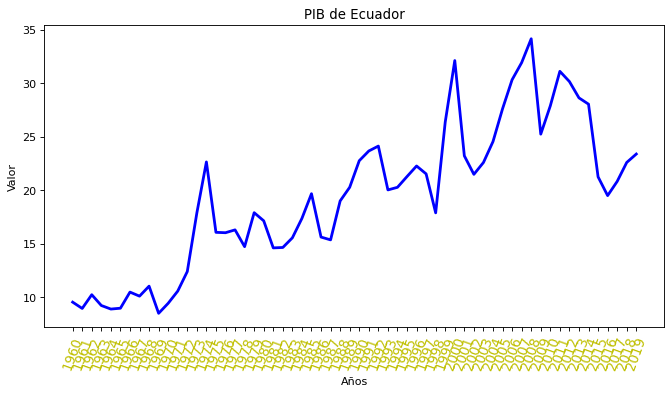

In [182]:
df['Anio']=df.index
plt.figure(figsize=(10,5), dpi=80)
plt.plot(df['Anio'], df['Ecuador'], color='blue', linewidth=2.5, linestyle="-")
plt.xticks(rotation=70,color='y', size=12)
plt.title('PIB de Ecuador')  
plt.xlabel('Años')  
plt.ylabel('Valor')

# Implementación del modelo de regresión Lineal 

Primero implementamos nuestra regresión con la comparación de dos variantes con respecto del PIB del Mundo con el de  nuestro país, y luego vamos a realizar el modelo con los años que tenemos de nuestro país y verificar como el PIB ha cambiado según los años y predecir que procentaje tendremos en un año determiando.

In [160]:
def regresion_lineal(data, y, *args):
    
    import pandas as pd
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics
    from sklearn.model_selection import train_test_split

    Y= data[y]
    X= data[args[0]]
    
    X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.3, random_state= 2)
    
    # Regresión lineal
    lm= LinearRegression()
    lm.fit(X_train, y_train)
    print('Cuadrados: ', lm.score(X_train, y_train))
    prediccion= lm.predict(pd.DataFrame(X_test))
    
    SSD= sum((y_test - prediccion)**2)
    RSE= np.sqrt(SSD/(len(data)-2))
    media= np.mean(y_test)
    print('Media: ', media)
    error= RSE/media
    # El error significa el porcentaje que el modelo no puede ser explicado
    print('Error: ', error)

In [161]:
y = 'Mundo'
x = ['Ecuador']
regresion_lineal(data_1, y, x)

Cuadrados:  0.7614171644622145
Media:  18.876215633888883
Error:  0.14144292092283492


Precisión:  0.699017421534448


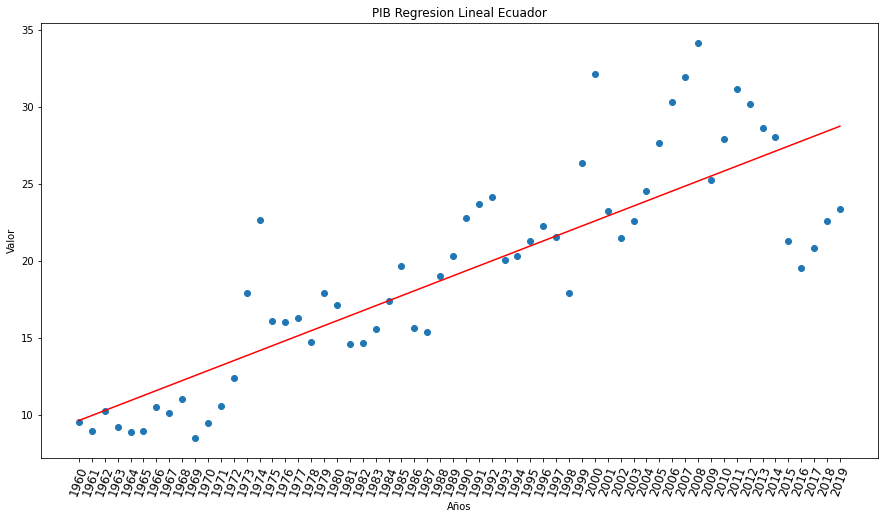

In [174]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

x=df['Anio'].values.reshape(-1,1)
y=df['Ecuador']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)
    
# Regresión lineal
lm= LinearRegression()
lm.fit(X_train, y_train)
print('Precisión: ', lm.score(X_train, y_train))
prediccion= lm.predict(X_test)

anios=np.arange(1960, 2020, dtype=int)
predecir_anios= lm.predict(anios.reshape(-1,1))
plt.figure(figsize=(15,8))
plt.scatter(x.flatten(),y)
plt.plot(x.flatten(),predecir_anios,'-r')
plt.xticks(rotation=70,color='black', size=12)
plt.xlabel('Años')  
plt.ylabel('Valor') 
plt.title('PIB Regresion Lineal Ecuador')
plt.show()


In [179]:
actual=df.loc['2019']['Ecuador']
anio=lm.predict([[2020]])
print('Valor PIB 2019 = ',actual)
print('Prediccion Regresion Lineal = ', anio[0])

Valor PIB 2019 =  23.39003998
Prediccion Regresion Lineal =  29.058548960023586


## Análisis
La regeresión lineal al contar con datos muy variantes se puede evidenciar que la precisión al comparar con una sola variante se obtiene un margen de error que es muy amplio pero al tratar con dos variantes en este caso con dos países el margen de error se disminuye y se obtiene un 80% por lo que el modelo se hace valido, al momento de predecir se observa que neustro modelo se acerca mucho a la realidad por lo que es muy a